## Laboratorio 8 - Data Science

### Julio Avila y Elisa Samayoa

### Cargamos los datos y hacemos la exploracion

           city  area  rooms  bathroom  parking spaces floor     animal  \
0     São Paulo    70      2         1               1     7      acept   
1     São Paulo   320      4         4               0    20      acept   
2  Porto Alegre    80      1         1               1     6      acept   
3  Porto Alegre    51      2         1               0     2      acept   
4     São Paulo    25      1         1               0     1  not acept   

       furniture  hoa (R$)  rent amount (R$)  property tax (R$)  \
0      furnished      2065              3300                211   
1  not furnished      1200              4960               1750   
2  not furnished      1000              2800                  0   
3  not furnished       270              1112                 22   
4  not furnished         0               800                 25   

   fire insurance (R$)  total (R$)  
0                   42        5618  
1                   63        7973  
2                   41        3841 

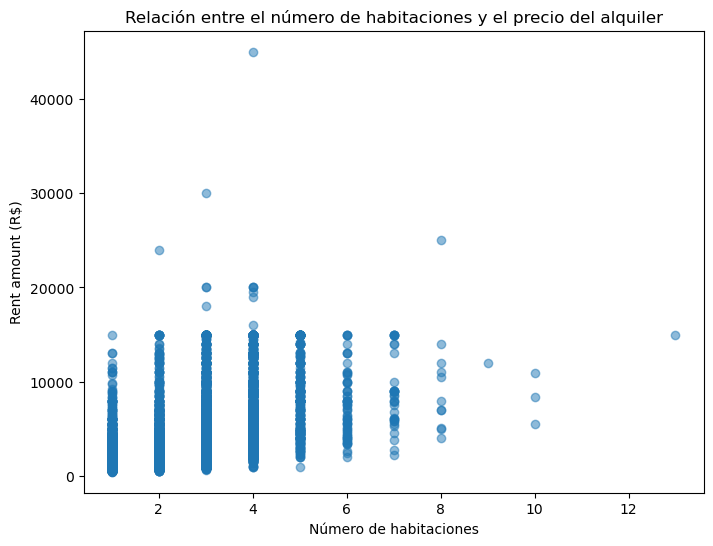

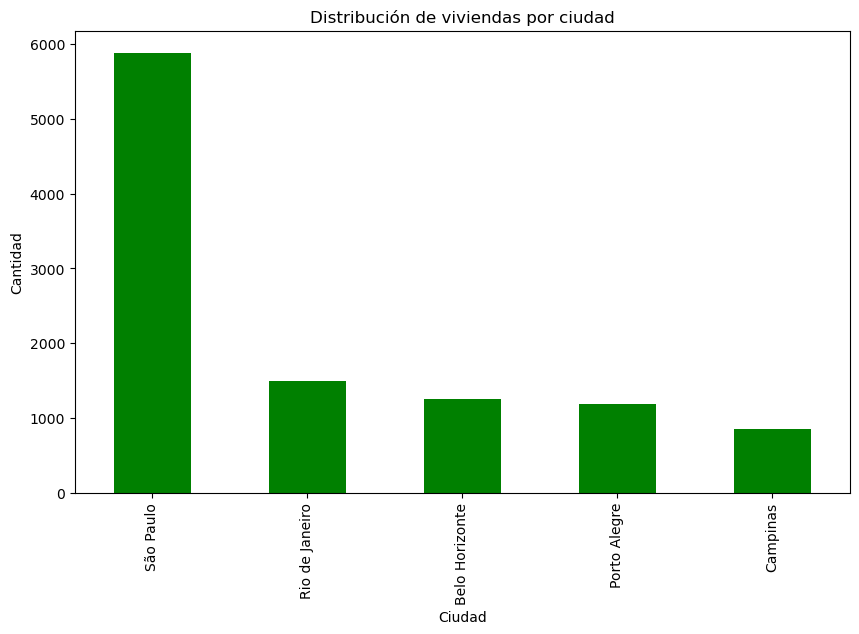

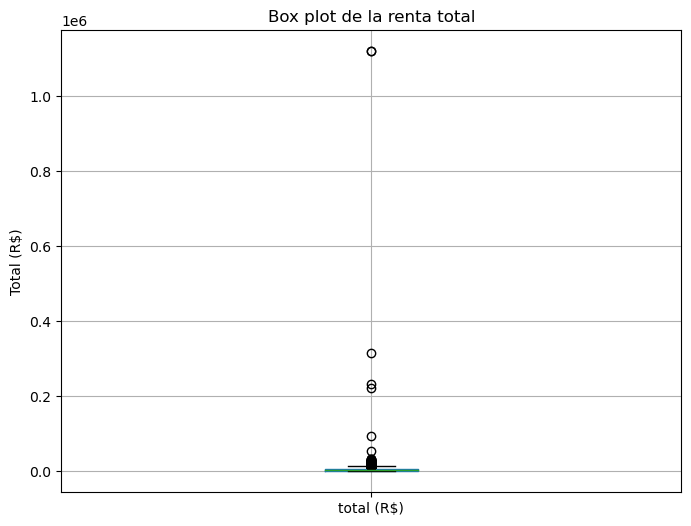

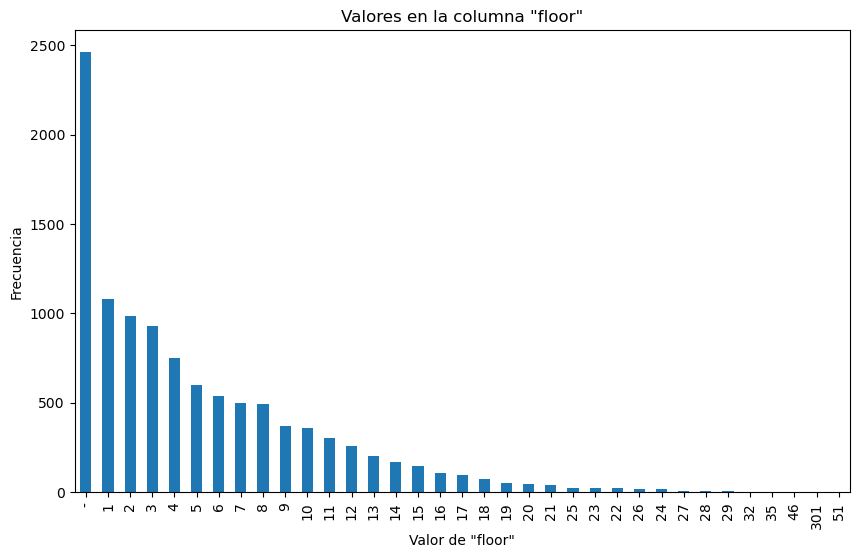

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
data = pd.read_csv('houses_to_rent_v2.csv')

# Exploración inicial de los datos
print(data.head())
print(data.describe())
print(data.info())

# Visualización de datos

# Gráfico de dispersión de 'rooms' vs 'rent amount (R$)'
plt.figure(figsize=(8, 6))
plt.scatter(data['rooms'], data['rent amount (R$)'], alpha=0.5)
plt.title('Relación entre el número de habitaciones y el precio del alquiler')
plt.xlabel('Número de habitaciones')
plt.ylabel('Rent amount (R$)')
plt.show()

# Gráfico de barras para la variable 'city'
city_counts = data['city'].value_counts()
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar', color='green')
plt.title('Distribución de viviendas por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad')
plt.show()

# Box plot para 'total (R$)'
plt.figure(figsize=(8, 6))
data.boxplot(column='total (R$)')
plt.title('Box plot de la renta total')
plt.ylabel('Total (R$)')
plt.show()

# Visualizar los valores en la columna 'floor'
floor_counts = data['floor'].value_counts()

# Gráfico de barras para la columna 'floor'
plt.figure(figsize=(10, 6))
floor_counts.plot(kind='bar')
plt.title('Valores en la columna "floor"')
plt.xlabel('Valor de "floor"')
plt.ylabel('Frecuencia')
plt.show()

data['floor'] = data['floor'].replace('-', 0)
data['floor'] = data['floor'].astype('int64')

print(data.columns)

In [2]:
unique_cities = data['city'].unique()
print(unique_cities)

['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']


### Pre procesamos y limpiamos la data para usarla en los modelos

In [3]:
data['animal'] = data['animal'].replace({'acept': 1, 'not acept': 0})
data['furniture'] = data['furniture'].replace({'furnished': 1, 'not furnished': 0})
data['floor'] = data['floor'].replace('-', 0)
city_mapping = {
    'São Paulo': 1,
    'Porto Alegre': 2,
    'Rio de Janeiro': 3,
    'Campinas': 4,
    'Belo Horizonte': 5
}

data['city'] = data['city'].replace(city_mapping)


In [4]:
print(data.head())


   city  area  rooms  bathroom  parking spaces  floor  animal  furniture  \
0     1    70      2         1               1      7       1          1   
1     1   320      4         4               0     20       1          0   
2     2    80      1         1               1      6       1          0   
3     2    51      2         1               0      2       1          0   
4     1    25      1         1               0      1       0          0   

   hoa (R$)  rent amount (R$)  property tax (R$)  fire insurance (R$)  \
0      2065              3300                211                   42   
1      1200              4960               1750                   63   
2      1000              2800                  0                   41   
3       270              1112                 22                   17   
4         0               800                 25                   11   

   total (R$)  
0        5618  
1        7973  
2        3841  
3        1421  
4         836  


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   city                 10692 non-null  int64
 1   area                 10692 non-null  int64
 2   rooms                10692 non-null  int64
 3   bathroom             10692 non-null  int64
 4   parking spaces       10692 non-null  int64
 5   floor                10692 non-null  int64
 6   animal               10692 non-null  int64
 7   furniture            10692 non-null  int64
 8   hoa (R$)             10692 non-null  int64
 9   rent amount (R$)     10692 non-null  int64
 10  property tax (R$)    10692 non-null  int64
 11  fire insurance (R$)  10692 non-null  int64
 12  total (R$)           10692 non-null  int64
dtypes: int64(13)
memory usage: 1.1 MB
None


In [8]:
import seaborn as sns
# Calcular la correlación de Pearson entre 'total' y las demás variables
correlation_with_total = data.corrwith(data['total (R$)'])
print(correlation_with_total)

correlation_with_mensual = data.corrwith(data['rent amount (R$)'])
print(correlation_with_mensual)

city                  -0.029268
area                   0.051799
rooms                  0.134597
bathroom               0.208339
parking spaces         0.148684
floor                  0.036431
animal                -0.007143
furniture              0.037781
hoa (R$)               0.955024
rent amount (R$)       0.264490
property tax (R$)      0.218344
fire insurance (R$)    0.254911
total (R$)             1.000000
dtype: float64
city                  -0.170962
area                   0.180742
rooms                  0.541758
bathroom               0.668504
parking spaces         0.578361
floor                  0.073596
animal                 0.067754
furniture              0.164235
hoa (R$)               0.036490
rent amount (R$)       1.000000
property tax (R$)      0.107884
fire insurance (R$)    0.987343
total (R$)             0.264490
dtype: float64


### Hacemos cuatro modelos para encontrar el mejor

In [93]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense

# Seleccionamos las características y el objetivo
features = ['city', 'area', 'rooms', 'bathroom', 'parking spaces','fire insurance (R$)' ]
X = data[features]
y = data['rent amount (R$)']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [94]:
# Normalización de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de red neuronal secuencial
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=6))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluar el modelo
y_pred_nn = model.predict(X_test_scaled)
mse_nn = mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)


67/67 [==============================] - 0s 3ms/step


In [95]:
# Crear el modelo de regresión lineal
regression_model = LinearRegression()

# Entrenar el modelo
regression_model.fit(X_train, y_train)

# Predecir con el modelo
y_pred_lr = regression_model.predict(X_test)

# Evaluar el modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)


In [96]:
from sklearn.ensemble import GradientBoostingRegressor

# Crear el modelo de Gradient Boosting (otro tipo de red neuronal)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
gb_model.fit(X_train, y_train)

# Predecir con el modelo
y_pred_gb = gb_model.predict(X_test)

# Evaluar el modelo
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)


In [97]:
# Crear otro modelo Random Forest
rf_model2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model2.fit(X_train, y_train)

# Predecir con el modelo
y_pred_rf2 = rf_model2.predict(X_test)

# Evaluar el modelo
mse_rf2 = mean_squared_error(y_test, y_pred_rf2)
mae_rf2 = mean_absolute_error(y_test, y_pred_rf2)
r2_rf2 = r2_score(y_test, y_pred_rf2)


### Evaluamos los metodos y encontramos que la red neuronal Gradient Boosting es el mejor modelo

In [98]:
import pandas as pd

# Crear un diccionario con las métricas de rendimiento
model_metrics = {
    'Modelo': ['Red Neuronal Keras', 'Regresión Lineal', 'Red Neuronal (Gradient Boosting)', 'Random Forest 2'],
    'MSE': [mse_nn, mse_lr, mse_gb, mse_rf2],
    'MAE': [mae_nn, mae_lr, mae_gb, mae_rf2],
    'R2': [r2_nn, r2_lr, r2_gb, r2_rf2]
}

# Crear un DataFrame a partir del diccionario
model_comparison = pd.DataFrame(model_metrics)

# Imprimir la matriz de comparación
print(model_comparison)


                             Modelo            MSE         MAE        R2
0                Red Neuronal Keras  207492.133488  268.662639  0.981217
1                  Regresión Lineal  257112.230885  335.822871  0.976725
2  Red Neuronal (Gradient Boosting)  127021.061549  194.379310  0.988501
3                   Random Forest 2  131230.411673  166.766748  0.988120


In [99]:
from math import sqrt

# Calcular RMSE para cada modelo
rmse_nn = sqrt(mse_nn)
rmse_lr = sqrt(mse_lr)
rmse_gb = sqrt(mse_gb)
rmse_rf2 = sqrt(mse_rf2)

# Crear una tabla de comparación con RMSE
model_metrics['RMSE'] = [rmse_nn, rmse_lr, rmse_gb, rmse_rf2]
model_comparison = pd.DataFrame(model_metrics)

# Imprimir la matriz de comparación con RMSE
print(model_comparison)

                             Modelo            MSE         MAE        R2  \
0                Red Neuronal Keras  207492.133488  268.662639  0.981217   
1                  Regresión Lineal  257112.230885  335.822871  0.976725   
2  Red Neuronal (Gradient Boosting)  127021.061549  194.379310  0.988501   
3                   Random Forest 2  131230.411673  166.766748  0.988120   

         RMSE  
0  455.513044  
1  507.062354  
2  356.400142  
3  362.257383  


In [100]:
!pip install ipywidgets

In [102]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import ipywidgets as widgets
from IPython.display import display

# Cargar tus datos y prepararlos como lo hiciste en tu código original

# Crear el modelo de Gradient Boosting (igual que en tu código original)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
gb_model.fit(X_train, y_train)

# Función para realizar predicciones
def make_prediction(city, area, rooms, bathroom, parking_spaces, fire_insurance):
    input_data = [[city, area, rooms, bathroom, parking_spaces, fire_insurance]]
    prediction = gb_model.predict(input_data)
    return prediction[0]

# Crear widgets interactivos para ingresar los valores
city_widget = widgets.Dropdown(options=unique_cities, description='City:')
area_widget = widgets.IntSlider(min=1, max=500, description='Area:')
rooms_widget = widgets.IntSlider(min=1, max=10, description='Rooms:')
bathroom_widget = widgets.IntSlider(min=1, max=5, description='Bathroom:')
parking_spaces_widget = widgets.IntSlider(min=0, max=5, description='Parking Spaces:')
fire_insurance_widget = widgets.IntSlider(min=0, max=500, description='Fire Insurance (R$):')

# Crear un widget para mostrar la predicción
prediction_widget = widgets.Label()

# Crear un botón para calcular la predicción
calculate_button = widgets.Button(description="Calcular Predicción")

# Función para calcular la predicción al hacer clic en el botón
def calculate_prediction(button):
    city = city_mapping[city_widget.value]
    area = area_widget.value
    rooms = rooms_widget.value
    bathroom = bathroom_widget.value
    parking_spaces = parking_spaces_widget.value
    fire_insurance = fire_insurance_widget.value
    prediction = make_prediction(city, area, rooms, bathroom, parking_spaces, fire_insurance)
    prediction_widget.value = f'Predicted Rent Amount (R$): {prediction:.2f}'

# Conectar el botón al manejador de eventos
calculate_button.on_click(calculate_prediction)

# Mostrar los widgets y el botón
display(city_widget, area_widget, rooms_widget, bathroom_widget, parking_spaces_widget, fire_insurance_widget)
display(calculate_button)
display(prediction_widget)


Dropdown(description='City:', options=('São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas', 'Belo Horizo…

IntSlider(value=1, description='Area:', max=500, min=1)

IntSlider(value=1, description='Rooms:', max=10, min=1)

IntSlider(value=1, description='Bathroom:', max=5, min=1)

IntSlider(value=0, description='Parking Spaces:', max=5)

IntSlider(value=0, description='Fire Insurance (R$):', max=500)

Button(description='Calcular Predicción', style=ButtonStyle())

Label(value='')